# K-Nearest Neighbors Algorithm on Multi-Temporal Remote Sensing Data of Japanese Forest Types
<i>Richard Vargas, California State University San Bernardino</i>

### Importing libraries

In [13]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import sklearn
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import proj3d
from matplotlib import offsetbox

### loadDataSet is a function that reads a CSV file and puts it into a dataframe format
<br>Dataframe is a data structure from the pandas library that will support our CSV data type
<br>We can use this to seperate both our training and testing data sets.

In [14]:
def loadDataSet(trainingSet):
    trainingData = pd.read_csv(trainingSet, index_col = 0)
    return trainingData

In [15]:
trainData = loadDataSet('training.csv')
testData = loadDataSet('testing.csv')
trainData.head()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
class,,,,,,,,,,,,,,,,,,,,,
d,39,36,57,91,59,101,93,27,60,75.70,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
h,84,30,57,112,51,98,92,26,62,30.58,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
s,53,25,49,99,51,93,84,26,58,63.20,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
s,59,26,49,103,47,92,82,25,56,55.54,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
d,57,49,66,103,64,106,114,28,59,59.44,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [16]:
trainData.iloc[:,:] = preprocessing.Normalizer(norm='l1').fit_transform(trainData)
trainData.head()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
class,,,,,,,,,,,,,,,,,,,,,
d,0.043989,0.040605,0.064292,0.102642,0.066548,0.113921,0.104897,0.030454,0.067676,0.085384,...,-0.002662,-0.020765,-0.002121,-0.007253,-0.023720,-0.001805,-0.006971,-0.025378,-0.005865,-0.008866
h,0.093183,0.033280,0.063231,0.124244,0.056576,0.108714,0.102058,0.028842,0.068778,0.033923,...,-0.002507,-0.018049,-0.002163,-0.006933,-0.020844,-0.002208,-0.006856,-0.025969,-0.009840,-0.012014
s,0.064532,0.030440,0.059662,0.120541,0.062097,0.113235,0.102277,0.031657,0.070620,0.076951,...,-0.001778,-0.019384,-0.002179,-0.005650,-0.021588,-0.000584,-0.005710,-0.024315,-0.004992,-0.008608
s,0.070289,0.030975,0.058376,0.122708,0.055993,0.109603,0.097690,0.029784,0.066715,0.066167,...,0.003193,-0.016405,-0.003014,-0.007553,-0.026245,-0.002788,-0.007863,-0.032285,-0.009519,-0.012878
d,0.059906,0.051498,0.069365,0.108251,0.067263,0.111404,0.119812,0.029428,0.062008,0.062470,...,-0.003090,-0.022848,-0.001724,-0.004856,-0.024950,-0.000893,-0.005780,-0.023994,-0.002880,-0.006138


### Spectral information based on image wave lengths
<br> Information is in green, red, and near infrared wavelengths
<br> Here we may just see the differences between a few of these wavelengths as examples of differences between instances (each dot on the scatter plot being an instance). 

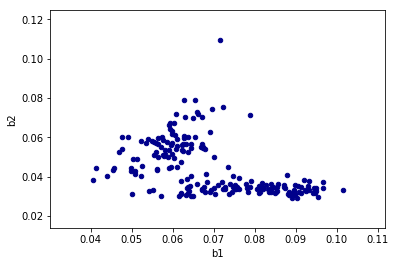

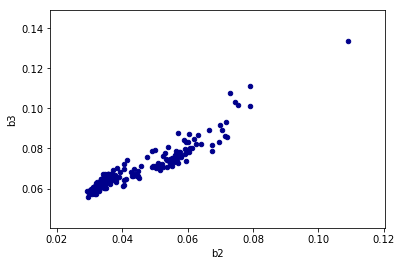

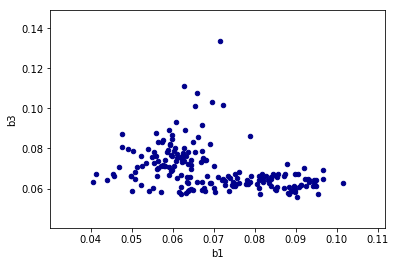

In [17]:
b1b2Plot = trainData.plot.scatter(x = 'b1', y = 'b2',c = 'DarkBlue')
b2b3Plot = trainData.plot.scatter(x = 'b2', y = 'b3',c = 'DarkBlue')
b1b3Plot = trainData.plot.scatter(x = 'b1', y = 'b3',c = 'DarkBlue')

### Predicted values based on spatial interpolation

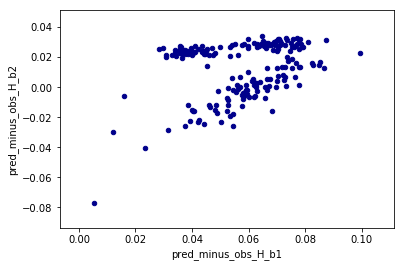

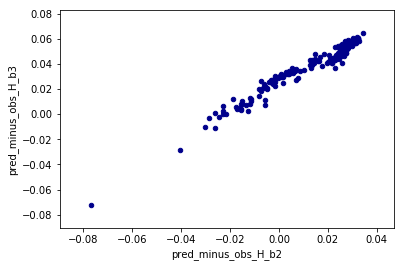

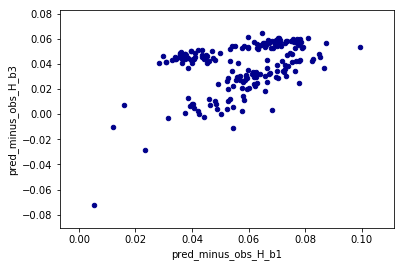

In [18]:
b1b2Plot = trainData.plot.scatter(x = 'pred_minus_obs_H_b1', y = 'pred_minus_obs_H_b2',c = 'DarkBlue')
b2b3Plot = trainData.plot.scatter(x = 'pred_minus_obs_H_b2', y = 'pred_minus_obs_H_b3',c = 'DarkBlue')
b1b3Plot = trainData.plot.scatter(x = 'pred_minus_obs_H_b1', y = 'pred_minus_obs_H_b3',c = 'DarkBlue')

### Some statistics about the trianing data
<br> Taking advantage some functions related to the dataframe class, we can see some statistical information about our data...

In [19]:
print trainData.describe()

               b1          b2          b3          b4          b5          b6  \
count  198.000000  198.000000  198.000000  198.000000  198.000000  198.000000   
mean     0.070027    0.044205    0.069636    0.112847    0.064573    0.111512   
std      0.013980    0.013521    0.010949    0.015857    0.008359    0.006260   
min      0.040595    0.029358    0.055606    0.061941    0.044352    0.074374   
25%      0.059703    0.033570    0.062253    0.102583    0.058899    0.108248   
50%      0.067165    0.037803    0.066262    0.115288    0.062524    0.112388   
75%      0.081960    0.054693    0.074692    0.126378    0.070053    0.115197   
max      0.101456    0.109173    0.133737    0.141376    0.089024    0.126320   

               b7          b8          b9  pred_minus_obs_H_b1  ...  \
count  198.000000  198.000000  198.000000           198.000000  ...   
mean     0.100496    0.031331    0.067514             0.057196  ...   
std      0.014937    0.006325    0.005884             0.0

In [20]:
pca = PCA(n_components=3)
pca.fit(trainData)
trainDataPCA = pca.transform(trainData)

#PCA(copy=True, n_components=3, whiten=False)

In [21]:
trainData3D = pd.DataFrame(trainDataPCA)
trainData3D.index = trainData.index
trainData3D.columns = ['PC1','PC2','PC3']
trainData3D.head()

,PC1,PC2,PC3
class,,,
d,-0.002151,-0.030848,-0.024420
h,-0.026831,0.027564,0.015230
s,-0.034567,-0.023441,-0.003817
s,-0.037393,-0.011204,0.003666
d,0.011813,0.008609,-0.030001


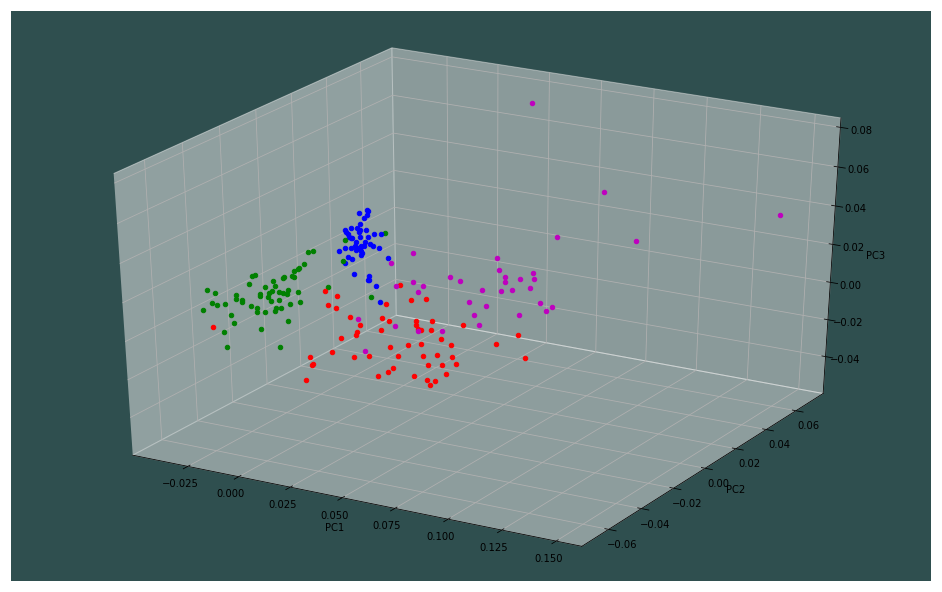

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111,projection=Axes3D.name,facecolor=(0.1843, 0.3098, 0.3098))

colorList = ['red','blue','green','purple']
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

for i in range(len(trainData3D)):
    x, y, z = trainData3D.iloc[i]['PC1'], trainData3D.iloc[i]['PC2'], trainData3D.iloc[i]['PC3']
    if trainData3D.index[i] == u'd ':
        color = 'r'
    elif trainData3D.index[i] == u'h ':
        color = 'b'
    elif trainData3D.index[i] == u's ':
        color = 'g'
    elif trainData3D.index[i] == u'o ':
        color = 'm'

        
    ax.scatter(x, y, z, c = color)
   
fig.set_size_inches(16.5, 10.5)
fig.savefig('test2png.png', dpi=100)

plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors = 3)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

knn.fit(X_train,y_train)


pred = knn.predict(X_test)

print accuracy_score(y2,pred)


NameError: name 'X' is not defined

So this is text
Hello
whatever